## 제주도 내국인 관광객 소비 패턴 분석

---

## 1. 프로젝트 개요

### 1-1. 프로젝트 요약
- 제목: 제주도 내국인 관광객 소비 패턴 분석
- 설명: 제주도를 방문한 내국인 관광객 소비 금액 및 업종별 분석 -> 제주도 창업 아이템 선정
- 사용한 데이터셋
    - [https://www.data.go.kr/data/15046091/fileData.do)]
- 데이터셋 설명
    - 2014~2016년도 제주도 내 내국인 관광객의 업종명, 성별, 연령대별로 카드이용금액, 카드이용건수, 건강이용금액 등의 정보
- 진행 절차 및 내용
    - EDA
    - ...
- 사용한 스킬셋
    - pandas
    - matplotlib, seaborn
    - ...

## 2. 데이터 로딩

### 2-1. 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
plt.rc('font',family='Malgun Gothic')

In [6]:
df = pd.read_csv('./raw_data/제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216.csv'
                 , encoding='cp949')
df

,기준년월,관광객 유형,제주 대분류,제주 중분류,업종명,성별,연령대별,카드이용금액,카드이용건수,건당이용금액,데이터기준일자
0,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,50대,14434000,67,215433,2017-02-16
1,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,50대,15119000,72,209986,2017-02-16
2,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,40대,7609500,41,185598,2017-02-16
3,2014-09,내국인 관광객,서귀포시,남원읍,농축수산품,남,50대,7092500,40,177313,2017-02-16
4,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,40대,9098500,59,154212,2017-02-16
...,...,...,...,...,...,...,...,...,...,...,...
13141,2016-08,내국인 관광객,서귀포시,남원읍,약국,남,30대,252900,43,5881,2017-02-16
13142,2016-08,내국인 관광객,서귀포시,대륜동,약국,남,20대,276100,49,5635,2017-02-16
13143,2016-08,내국인 관광객,서귀포시,대륜동,기타음료식품,남,30대,610850,118,5177,2017-02-16
13144,2016-08,내국인 관광객,서귀포시,대륜동,기타음료식품,여,20대,416900,85,4905,2017-02-16


### 2-2. 데이터 확인

In [7]:
df.shape

(13146, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기준년월      13146 non-null  object
 1   관광객 유형    13146 non-null  object
 2   제주 대분류    13146 non-null  object
 3   제주 중분류    13146 non-null  object
 4   업종명       13146 non-null  object
 5   성별        13146 non-null  object
 6   연령대별      13146 non-null  object
 7    카드이용금액   13146 non-null  int64 
 8    카드이용건수   13146 non-null  int64 
 9   건당이용금액    13146 non-null  int64 
 10  데이터기준일자   13146 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.1+ MB


In [9]:
df.describe()

,카드이용금액,카드이용건수,건당이용금액
count,1.314600e+04,13146.000000,13146.000000
mean,3.697184e+06,133.308079,35163.811273
std,6.232327e+06,210.459082,35421.702281
min,3.610000e+04,10.000000,3520.000000
25%,5.958600e+05,23.000000,13939.250000
50%,1.533550e+06,54.000000,21007.500000
75%,3.863175e+06,143.000000,46235.750000
max,6.427770e+07,2574.000000,539047.000000


In [10]:
df.isnull().sum() # null 값 없음

기준년월        0
관광객 유형      0
제주 대분류      0
제주 중분류      0
업종명         0
성별          0
연령대별        0
 카드이용금액     0
 카드이용건수     0
건당이용금액      0
데이터기준일자     0
dtype: int64

In [11]:
df.duplicated().sum() # 중복 값 없음

0

In [12]:
df.columns

Index(['기준년월', '관광객 유형', '제주 대분류', '제주 중분류', '업종명', '성별', '연령대별', ' 카드이용금액 ',
       ' 카드이용건수 ', '건당이용금액', '데이터기준일자'],
      dtype='object')

### 2-3. 데이터 전처리

#### 데이터 기준일자 제거

In [13]:
df = df.drop(columns=['데이터기준일자'])

#### 기준년월 
- 2014년은 9~12월까지
- 2015년은 1~12월까지
- 2016년은 1~8까지 존재

In [14]:
df['기준년월'].unique()

array(['2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02',
       '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08',
       '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02',
       '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08'],
      dtype=object)

**년도와 월로 분리**

In [15]:
df['년도'] = df['기준년월'].str.split('-',expand=True)[0]
df['월'] = df['기준년월'].str.split('-',expand=True)[1]

In [16]:
df.head()

,기준년월,관광객 유형,제주 대분류,제주 중분류,업종명,성별,연령대별,카드이용금액,카드이용건수,건당이용금액,년도,월
0,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,50대,14434000,67,215433,2014,09
1,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,50대,15119000,72,209986,2014,09
2,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,40대,7609500,41,185598,2014,09
3,2014-09,내국인 관광객,서귀포시,남원읍,농축수산품,남,50대,7092500,40,177313,2014,09
4,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,40대,9098500,59,154212,2014,09


## 3. EDA

### 3-1. 관광객 성별 분포



#### 미세하게 남자가 더 많음

In [17]:
gender_df = df['성별'].value_counts()
gender_df

남    6609
여    6537
Name: 성별, dtype: int64

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, '관광객 성별 분포')

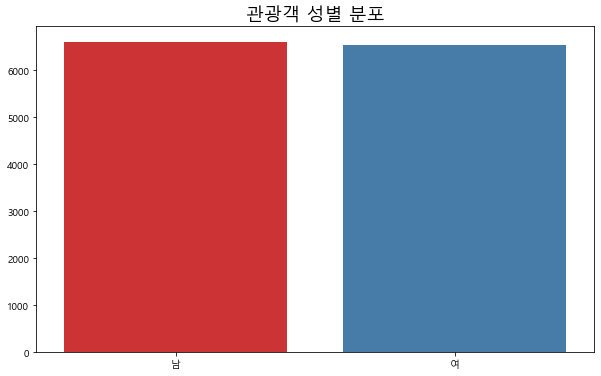

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_df.index, y=gender_df.values, palette='Set1')
plt.title('관광객 성별 분포', fontsize=18)
plt.show()

### 3-2. 제주시(대분류) 분포



#### 제주시, 서귀포시에서 소비

In [19]:
jeju_si_df = df['제주 대분류'].value_counts()
jeju_si_df

제주시     8729
서귀포시    4417
Name: 제주 대분류, dtype: int64

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, '제주시(대분류) 분포')

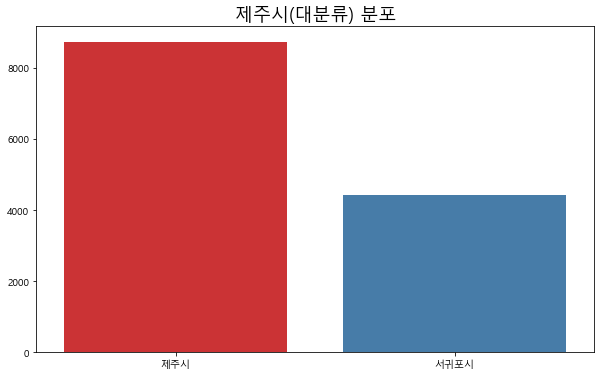

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x=jeju_si_df.index, y=jeju_si_df.values, palette='Set1')
plt.title('제주시(대분류) 분포', fontsize=18)
plt.show()

### 3-3. 제주시(중분류) 분포



#### 연동에서 가장 많은 소비 이루어짐

In [21]:
jeju_dong_df = df['제주 중분류'].value_counts()
jeju_dong_df

연동      2063
노형동     1623
이도2동    1527
성산읍     1425
삼도2동    1327
용담2동    1231
남원읍     1117
예래동     1025
애월읍      958
대륜동      850
Name: 제주 중분류, dtype: int64

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, '제주시(중분류) 분포')

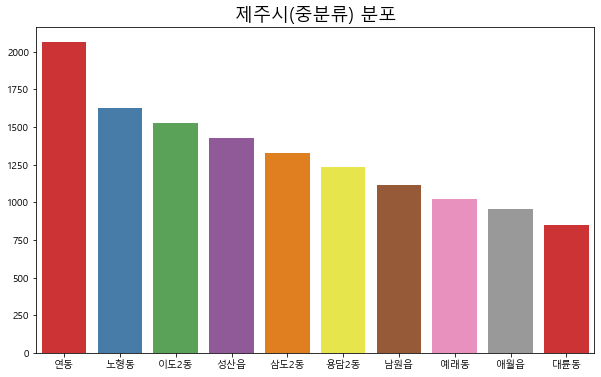

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x=jeju_dong_df.index, y=jeju_dong_df.values, palette='Set1')
plt.title('제주시(중분류) 분포', fontsize=18)
plt.show()

### 3-4. 업종별 분포



#### 슈퍼마켓, 농축수산품, 스낵 주로 식생활에 관련된 업종이 가장 많음

In [23]:
sector_df = df['업종명'].value_counts()
sector_df

슈퍼 마켓      1911
농축수산품      1884
스넥         1734
약국         1606
기타음료식품     1484
의원         1073
기념품 점      1017
스포츠레져용품     840
정장(여성)      673
악세 사리       403
안경          384
신   발        95
골프 용품        39
귀 금 속         3
Name: 업종명, dtype: int64

<Figure size 1152x720 with 0 Axes>

Text(0.5, 1.0, '업종별 분포')

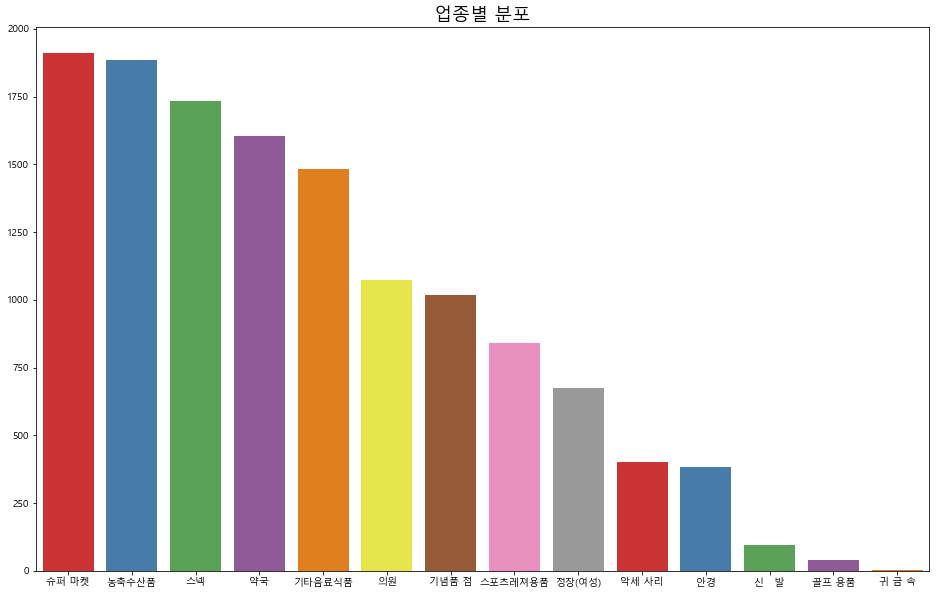

In [76]:
plt.figure(figsize=(16, 10))
sns.barplot(x=sector_df.index, y=sector_df.values, palette='Set1')
plt.title('업종별 분포', fontsize=18)
plt.show()

### 3-5. 연령대별 분포



#### 30,40대가 가장 많음

In [25]:
age_df = df['연령대별'].value_counts()
age_df

30대    3565
40대    3428
20대    3137
50대    3016
Name: 연령대별, dtype: int64

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, '연령대별 분포')

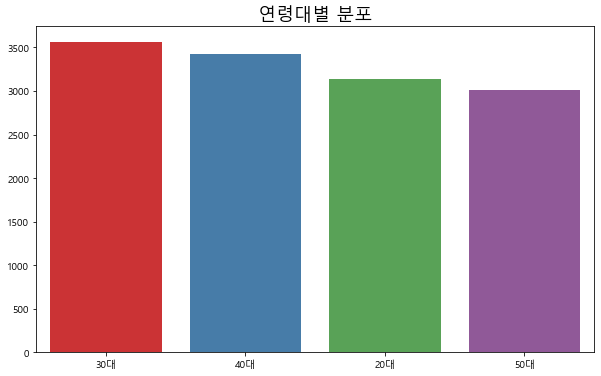

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x=age_df.index, y=age_df.values, palette='Set1')
plt.title('연령대별 분포', fontsize=18)
plt.show()

#### 기본 EDA 완료

---

#### 년도별 카드이용금액, 이용건수, 건당이용금액 

In [30]:
consum_df = df.groupby('년도').sum().reset_index()
consum_df

,년도,카드이용금액,카드이용건수,건당이용금액
0,2014,6618480931,225092,72963884
1,2015,23783496181,859722,226093659
2,2016,18201204162,667654,163205920


#### 년도, 월별 방문객 수 

- 2014년부터 2016년까지 증가 추세를 보이는 것을 알 수 있음
- 2015, 2016년 기준 8월달 방문객이 가장 많음

In [35]:
year_df = df.groupby(['년도', '월'])['기준년월'].count().reset_index()
year_df

,년도,월,기준년월
0,2014,09,511
1,2014,10,529
2,2014,11,505
3,2014,12,490
4,2015,01,507
5,2015,02,498
6,2015,03,525
7,2015,04,531
8,2015,05,550
9,2015,06,550


<Figure size 1152x720 with 0 Axes>

Text(0.5, 1.0, '월별 방문객 수')

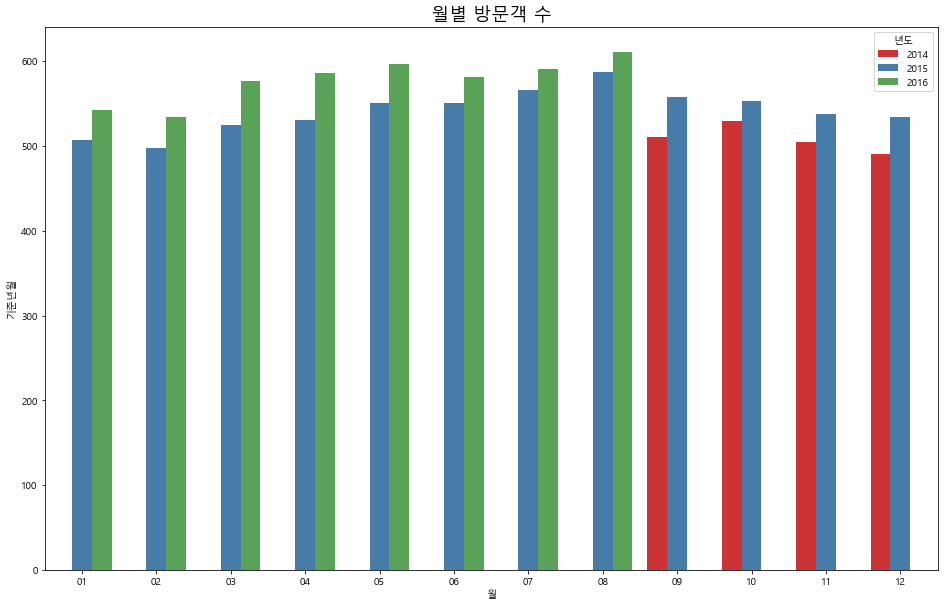

In [74]:
plt.figure(figsize=(16, 10))
sns.barplot(x='월', y='기준년월', data=year_df, palette='Set1', hue='년도')
plt.title('월별 방문객 수', fontsize=18)
plt.show()

#### 년도, 월별 카드이용금액 

- 방문객이 많은 8월에 가장 많은 이용금액을 보임
- 방문객 수의 선 그래프와 거의 일치한 흐름을 보임

In [43]:
money_df = df.groupby(['년도', '월'])[' 카드이용금액 '].sum().reset_index()
money_df

,년도,월,카드이용금액
0,2014,09,1630695896
1,2014,10,1913689868
2,2014,11,1682845294
3,2014,12,1391249873
4,2015,01,1637184256
5,2015,02,1441083309
6,2015,03,1749752195
7,2015,04,2070007618
8,2015,05,2185021183
9,2015,06,1848564121


<Figure size 1152x720 with 0 Axes>

Text(0.5, 1.0, '월별 카드이용금액')

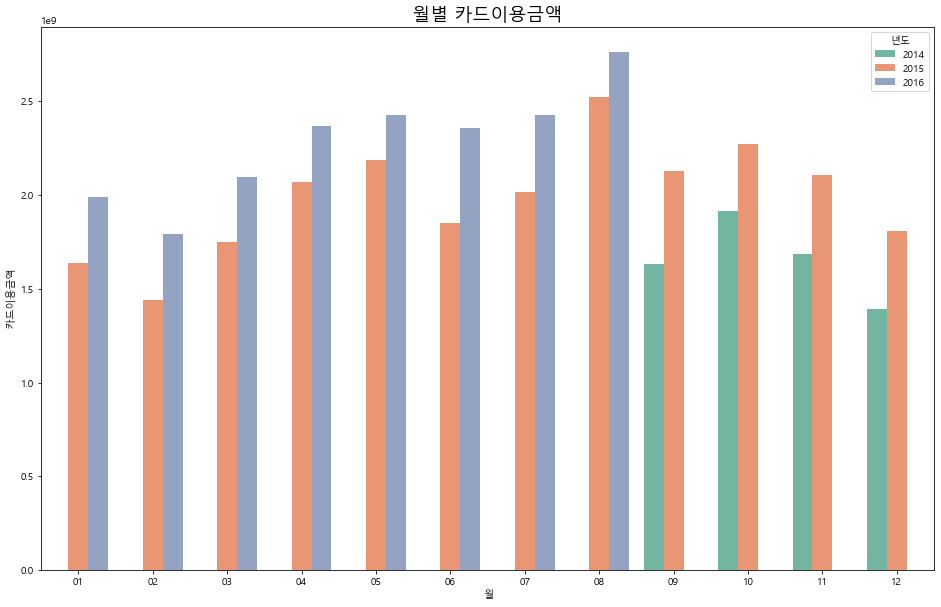

In [71]:
plt.figure(figsize=(16, 10))
sns.barplot(x='월', y=' 카드이용금액 ', data=money_df, palette='Set2', hue='년도')
plt.title('월별 카드이용금액', fontsize=18)
plt.show()

#### 년도, 월별 카드이용건수
- 앞서 본 그래프들과 흐름이 비슷함을 알 수 있음

In [50]:
money_cnt_df = df.groupby(['년도', '월'])[' 카드이용건수 '].sum().reset_index()
money_cnt_df

,년도,월,카드이용건수
0,2014,09,58665
1,2014,10,62701
2,2014,11,54270
3,2014,12,49456
4,2015,01,58657
5,2015,02,54043
6,2015,03,59575
7,2015,04,67189
8,2015,05,75573
9,2015,06,71705


<Figure size 1152x720 with 0 Axes>

Text(0.5, 1.0, '월별 카드이용건수')

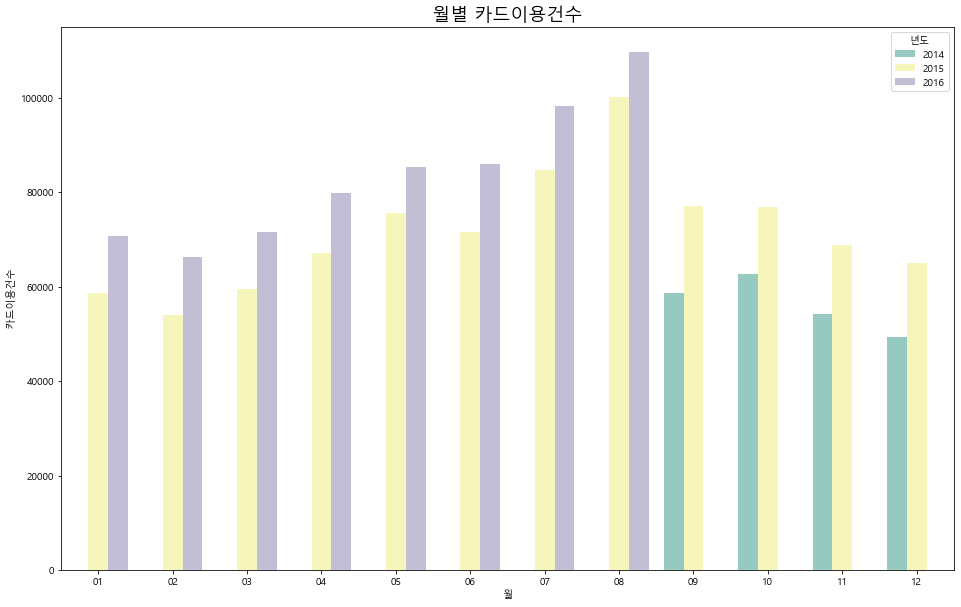

In [72]:
plt.figure(figsize=(16, 10))
sns.barplot(x='월', y=' 카드이용건수 ', data=money_cnt_df, palette='Set3', hue='년도')
plt.title('월별 카드이용건수', fontsize=18)
plt.show()

#### 연령대별 카드이용금액
- 30,40대가 가장 많음

In [63]:
result = df.groupby('연령대별')[' 카드이용금액 '].sum().reset_index()
result[' 카드이용금액 '] = result[' 카드이용금액 '].apply(lambda x: '{:,.0f}'.format(x))
result

,연령대별,카드이용금액
0,20대,"7,399,961,053"
1,30대,"14,856,286,866"
2,40대,"14,370,117,286"
3,50대,"11,976,816,069"


In [65]:
money_by_year = df.groupby('연령대별')[' 카드이용금액 '].sum().reset_index()

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, '연령대별 카드이용금액')

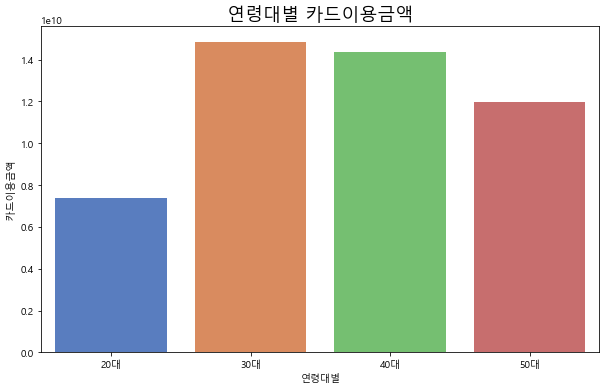

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='연령대별', y=' 카드이용금액 ', data=money_by_year, palette='muted')
plt.title('연령대별 카드이용금액', fontsize=18)
plt.show()

#### 연령대&성별 카드이용금액
- 소비가 많았던 30,40대에 집중해서 보면
- 30대는 성별간 큰 차이가 없고 40대는 남자의 소비금액이 여자 소비금액보다 약 21억정도 차이가 나는 것을 알 수 있음 

In [80]:
result = df.groupby(['연령대별','성별'])[' 카드이용금액 '].sum().reset_index()
result[' 카드이용금액 '] = result[' 카드이용금액 '].apply(lambda x: '{:,.0f}'.format(x))
result

,연령대별,성별,카드이용금액
0,20대,남,"2,934,577,701"
1,20대,여,"4,465,383,352"
2,30대,남,"7,662,140,790"
3,30대,여,"7,194,146,076"
4,40대,남,"8,216,762,169"
5,40대,여,"6,153,355,117"
6,50대,남,"6,901,429,531"
7,50대,여,"5,075,386,538"


In [81]:
money_by_year_gender = df.groupby(['연령대별','성별'])[' 카드이용금액 '].sum().reset_index()

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, '연령대&성별 카드이용금액')

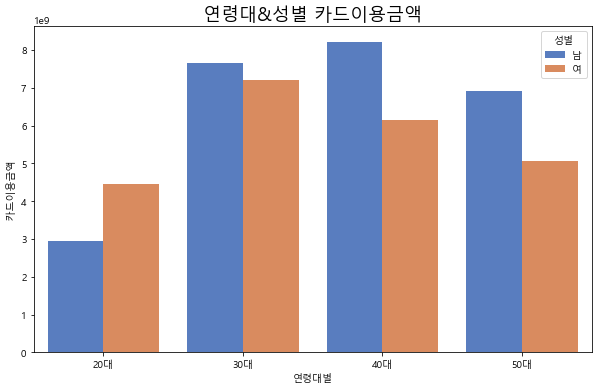

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x='연령대별', y=' 카드이용금액 ', data=money_by_year_gender, palette='muted', hue='성별')
plt.title('연령대&성별 카드이용금액', fontsize=18)
plt.show()

#### 연령대별 가장 많이 쓴 업종명

In [85]:
result = df.groupby(['연령대별','업종명'])[' 카드이용금액 '].sum().reset_index()
result[' 카드이용금액 '] = result[' 카드이용금액 '].apply(lambda x: '{:,.0f}'.format(x))
result

,연령대별,업종명,카드이용금액
0,20대,귀 금 속,"1,193,100"
1,20대,기념품 점,"1,491,000,000"
2,20대,기타음료식품,"224,812,970"
3,20대,농축수산품,"1,092,047,075"
4,20대,슈퍼 마켓,"1,346,774,846"
5,20대,스넥,"1,503,180,723"
6,20대,스포츠레져용품,"524,771,303"
7,20대,신 발,"25,271,300"
8,20대,악세 사리,"120,077,170"
9,20대,안경,"157,381,360"


In [96]:
money_by_ctg = df.groupby(['연령대별','업종명'])[' 카드이용금액 '].sum().reset_index().sort_values(' 카드이용금액 ',ascending=False).drop_duplicates('연령대별',keep='first')
money_by_ctg

,연령대별,업종명,카드이용금액
43,50대,농축수산품,4839790322
31,40대,슈퍼 마켓,3932559693
17,30대,슈퍼 마켓,3601002293
5,20대,스넥,1503180723


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, '연령대별 가장 많이 쓴 업종')

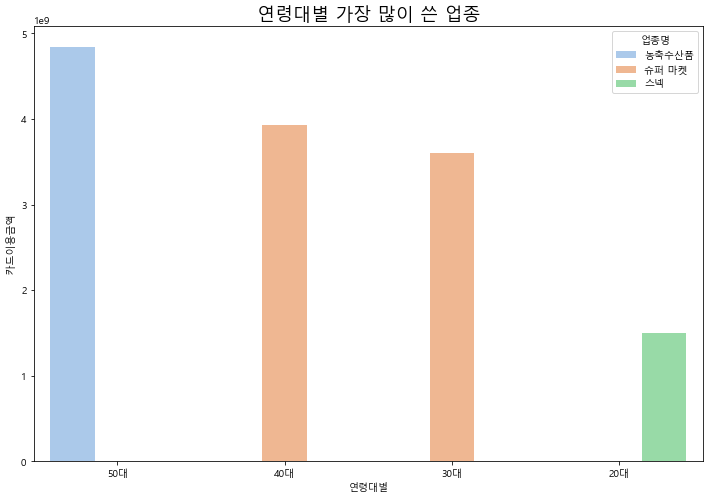

In [102]:
plt.figure(figsize=(12, 8))
sns.barplot(x='', y=' 카드이용금액 ', data=money_by_ctg, palette='pastel', hue='업종명')
plt.title('연령대별 가장 많이 쓴 업종', fontsize=18)
plt.show()